<a href="https://www.kaggle.com/code/poojakritarth/mobile-device-usage-user-behavior-analysis?scriptVersionId=215885352" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import image module
from IPython.display import Image 
  
# get the image 
Image(url="https://www.investopedia.com/thmb/CCYRTce_i-KIbocL1k50TpWqKl8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-1036256804-6f03495f031246a6b1d86daa43df73ee.jpg",width=1000)

**Introduction :**

The purpose of this analysis is to explore and evaluate trends in mobile device usage and user behavior using the "Mobile Device Usage and User Behavior" dataset.

The dataset includes detailed information on factors such as :

  -  User ID : Showing ID of Users.
  -  Device Model : Name of mobile models.
  -  Operating system : Showing operating system of mobile devices.
  -  App Usage Time (min/day) : Showing time of App Usage.
  -  Screen On Time (hours/day) : Showing time of Screen on.
  -  Battery Drain (mAh/day) : Showing Battery Usage.
  -  Number of Apps Installed : Showing Number of Apps installed by Users.
  -  Data Usage (MB/day) : showing data ussge by Users.
  -  Age : Showing age of Users.
  -  Gender : Showing  gender of Users.
  -  User Behavior Class : Showing Use of device by Users.

By analyzing these attributes, the goal is to uncover meaningful insights into user behavior, which can guide app development strategies, device optimization, and user engagement models.

The analysis is particularly focused on segmenting the data by age and gender to identify patterns and trends among different demographic groups. This includes examining data usage, screen-on time, and app usage time, and understanding the distribution of user behavior classes across various user categories.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


## 1 Loading Data

In [3]:
path = "/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


### 1.1 Showing information about Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


### 1.2 Dealing with Null and Duplicate Values.

In [8]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [10]:
df.drop_duplicates()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [11]:
print(len(df) - len(df.drop_duplicates()))

0


In [12]:
df.drop('User ID', axis = 1, inplace = True)
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [13]:
df.dropna()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


### 1.3 Finding lower and Upper value of User Behavior Class

In [14]:
df['User Behavior Class'].min()

1

In [15]:
df['User Behavior Class'].max()

5

### 1.4 Changing value  in User behaviour class as 1 = light usage, 2 = moderate usage, 3 = regular usage, 4 = high usage, 5 = extream usage.

In [16]:
mymap = {1:"1-Light Usage",2:"2-Moderate Usage",3:"3-Regular Usage",4:"4-High Usage",5:"5-Extream Usage"}
df['User Behavior Class'] = df['User Behavior Class'].map(lambda s: mymap.get(s) if s in mymap else s)

In [17]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4-High Usage
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3-Regular Usage
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2-Moderate Usage
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3-Regular Usage
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3-Regular Usage


### 1.5 Pie chart showing distribution of User behavior classes.

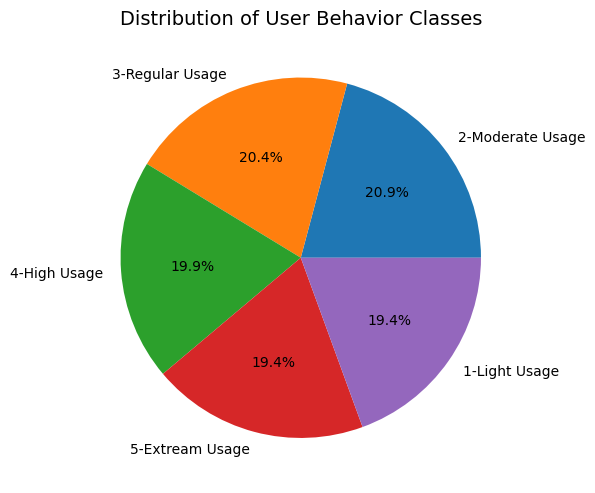

In [18]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Count the number of users in each behavior class
behavior_counts = df['User Behavior Class'].value_counts()

# Create a pie chart
plt.pie(behavior_counts, labels=behavior_counts.index, autopct='%1.1f%%')

# Set the title of the plot
plt.title('Distribution of User Behavior Classes', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

## 2. Exploratory Data Analysis.

### 2 Discribing data

In [19]:
df.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


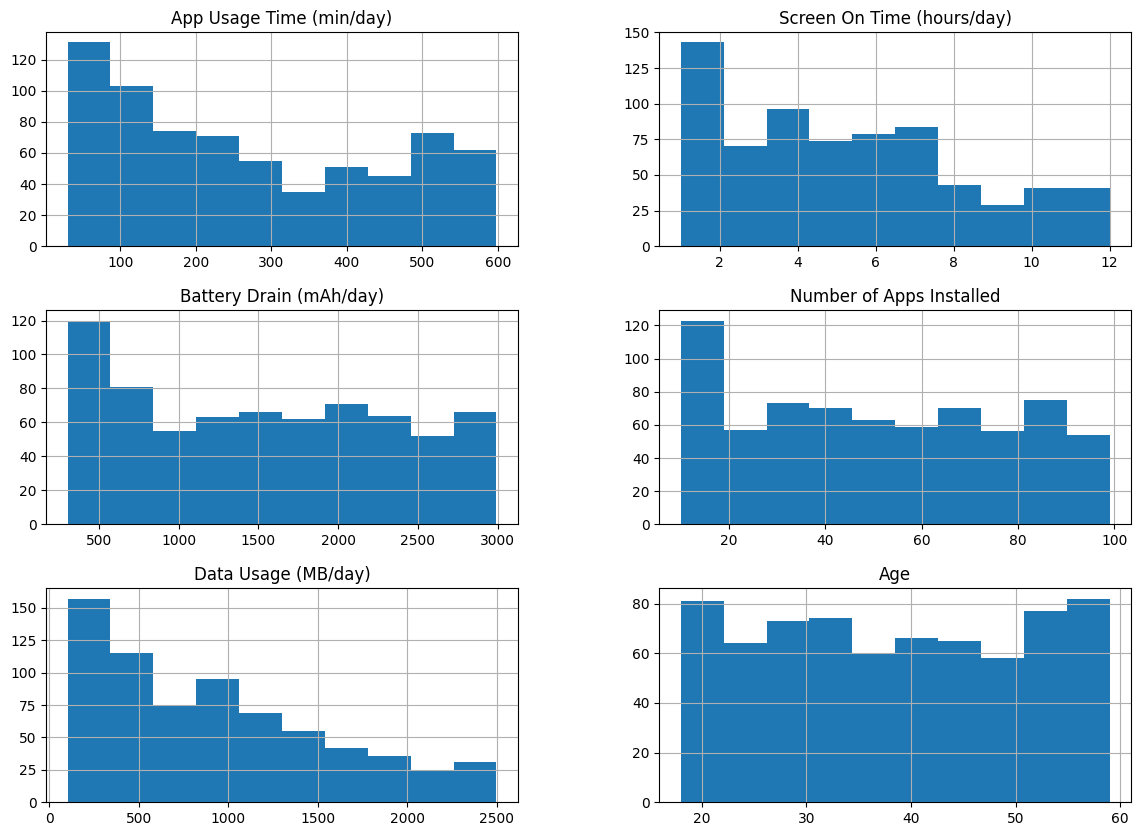

In [20]:
# To get a idea of the distributions of the data Plot the histograms of the features.
import matplotlib.pyplot as plt

df.hist(bins = 10, figsize = (14, 10))
plt.show()

### 2.1 Data Usage as per Gender.

In [21]:
df.groupby(by = "Gender").sum()['Data Usage (MB/day)']

Gender
Female    307212
Male      343608
Name: Data Usage (MB/day), dtype: int64

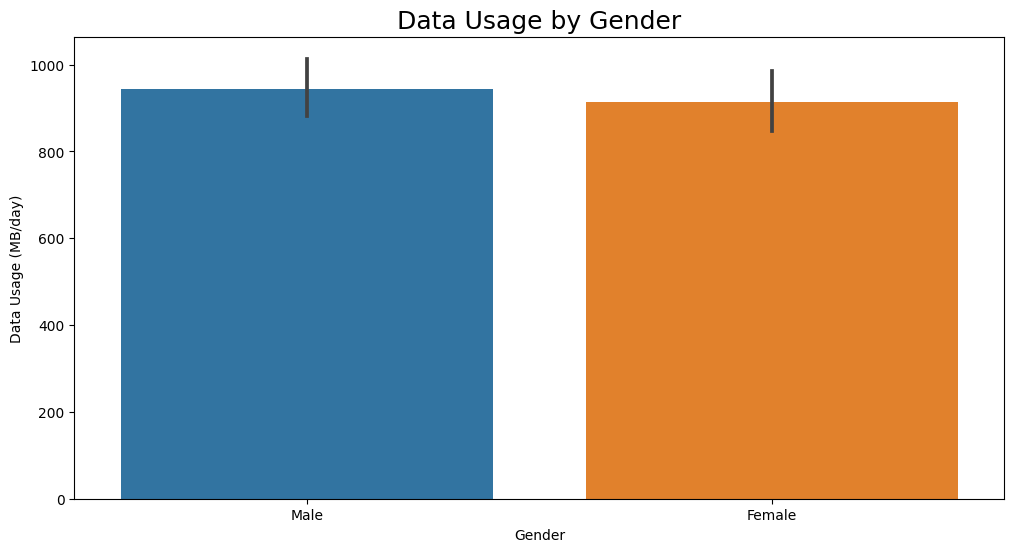

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Gender'],y=df['Data Usage (MB/day)'])
plt.title('Data Usage by Gender',fontsize=18)
plt.show()

### 2.2 Screen on Time as per the Gender.

In [23]:
df.groupby(by = "Gender").sum()['Screen On Time (hours/day)']

Gender
Female    1767.8
Male      1923.1
Name: Screen On Time (hours/day), dtype: float64

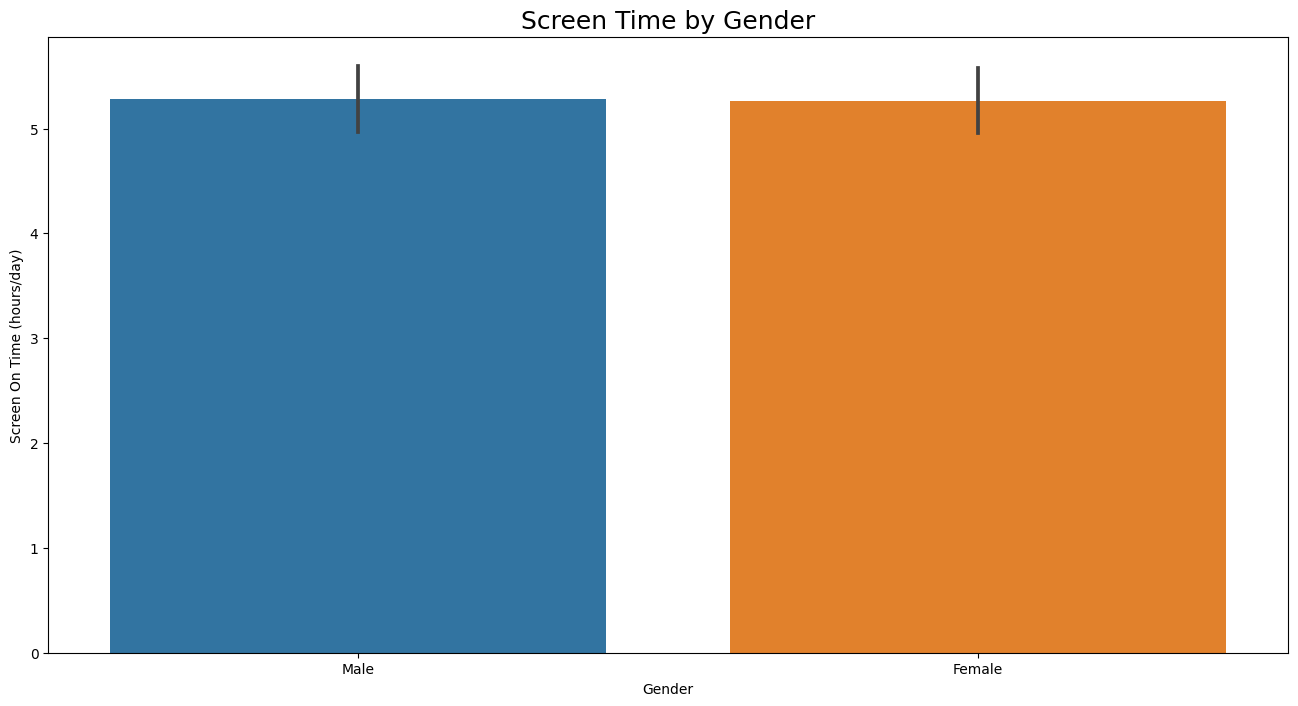

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['Gender'],y=df['Screen On Time (hours/day)'])
plt.title('Screen Time by Gender',fontsize=18)
plt.show()

### 2.3 App Usage Time by Gender.

In [25]:
df.groupby(by = "Gender").sum()['App Usage Time (min/day)']

Gender
Female    91381
Male      98409
Name: App Usage Time (min/day), dtype: int64

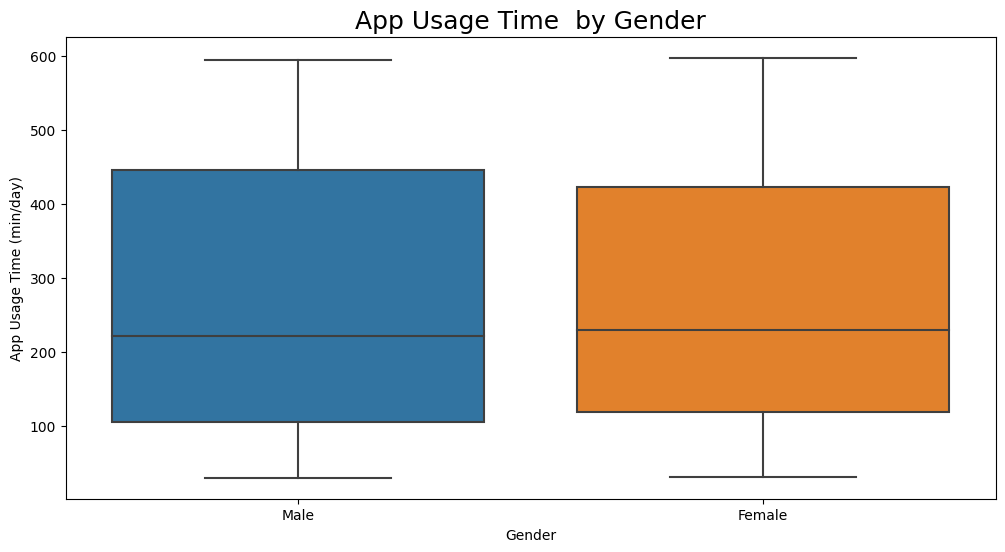

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender',y='App Usage Time (min/day)',data=df)
plt.title('App Usage Time  by Gender',fontsize=18)
plt.show()

### 2.4 Device model names and counts

In [27]:
df["Device Model"].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [28]:
df.groupby(by = "Device Model").size()

Device Model
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Xiaomi Mi 11          146
iPhone 12             146
dtype: int64

### 2.5 Adding new coloum "Age Groups".

In [29]:
# Finding max age in given dataframe.
df["Age"].max()

59

In [30]:
# Finding min age in given dataframe.
df["Age"].min()

18

In [31]:
# Adding new coloum "Age groups".
age_bin = [10,20,30,40,50,60]
age_group = ['10-20','20-30','30-40','40-50','50-60']
df["Age groups"] = pd.cut(df['Age'], bins=age_bin, labels=age_group, right=False)
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age groups
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4-High Usage,40-50
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3-Regular Usage,40-50
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2-Moderate Usage,40-50
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3-Regular Usage,20-30
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3-Regular Usage,30-40
...,...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2-Moderate Usage,20-30
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4-High Usage,50-60
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2-Moderate Usage,50-60
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1-Light Usage,40-50


### 2.6 Screen on time for the Age groups.

In [32]:
df.groupby(by = "Age groups").sum()['Screen On Time (hours/day)']

/tmp/ipykernel_17/2445010251.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = "Age groups").sum()['Screen On Time (hours/day)']


Age groups
10-20    117.4
20-30    939.6
30-40    865.6
40-50    837.3
50-60    931.0
Name: Screen On Time (hours/day), dtype: float64

/tmp/ipykernel_17/2651317642.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Screentime_of_Agegroups = df.groupby(by = "Age groups").sum()['Screen On Time (hours/day)']


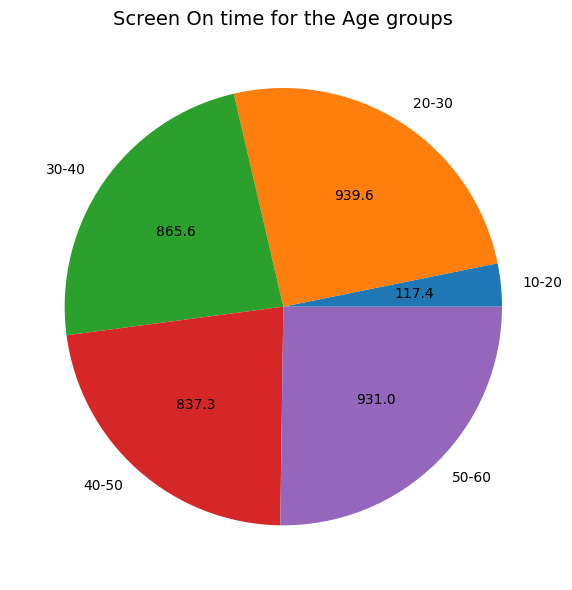

In [33]:
#Set the figure size
plt.figure(figsize=(6, 6))

# Count the number of users in each behavior class
Screentime_of_Agegroups = df.groupby(by = "Age groups").sum()['Screen On Time (hours/day)']

# Create a pie chart
labels = Screentime_of_Agegroups.index
sizes = Screentime_of_Agegroups.values
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
plt.pie(Screentime_of_Agegroups, labels=Screentime_of_Agegroups.index,autopct = absolute_value)

# Set the title of the plot
plt.title('Screen On time for the Age groups', fontsize=14)

# Display the plot
plt.tight_layout()

#### --pie chart of "Screen On time for the Age groups" by percentage.

/tmp/ipykernel_17/3000925902.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Screentime_of_Agegroups = df.groupby(by = "Age groups").sum()['Screen On Time (hours/day)']


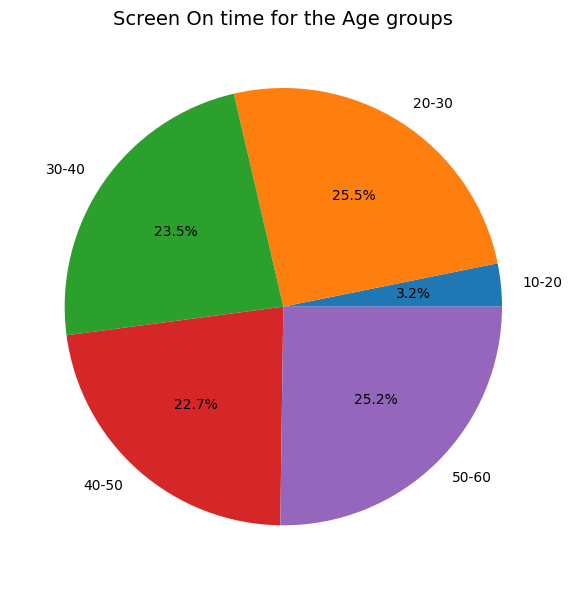

In [34]:
#Set the figure size
plt.figure(figsize=(6, 6))

# Count the number of users in each behavior class
Screentime_of_Agegroups = df.groupby(by = "Age groups").sum()['Screen On Time (hours/day)']

# Create a pie chart
plt.pie(Screentime_of_Agegroups, labels=Screentime_of_Agegroups.index, autopct='%1.1f%%')

# Set the title of the plot
plt.title('Screen On time for the Age groups', fontsize=14)

# Display the plot
plt.tight_layout()

### 2.7 Barplot showing App Usage Time by Age

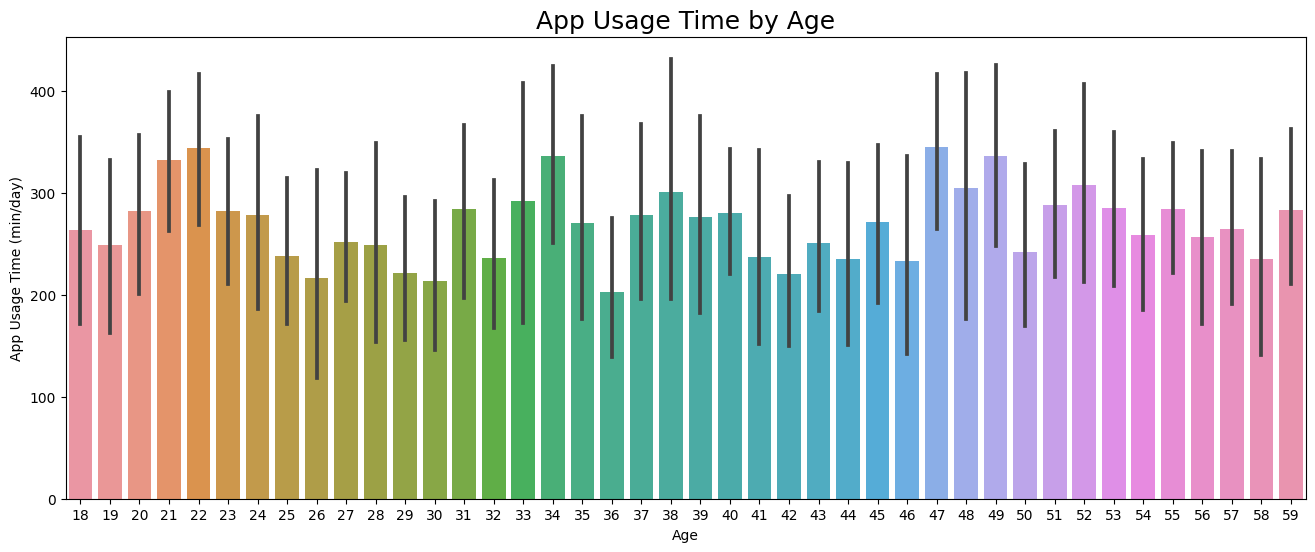

In [35]:
plt.figure(figsize=(16,6))
sns.barplot(x='Age',y='App Usage Time (min/day)',data=df)
plt.title('App Usage Time by Age',fontsize=18)
plt.show()

**Conclution :**

- **User Behavior Class Distribution :** The majority of users are classified into "Moderate Usage" and "Regular Usage" categories, with fewer users falling into "Extreme Usage" or "Light Usage" groups.
A pie chart visualization confirms the proportional representation of each user behavior class.

- **Data Usage by Gender :** Male users, on average, consume slightly more data per day compared to female users. The bar plot demonstrates this trend clearly, with a visible difference in average daily data usage.

- **Screen-On Time by Gender :** Male users tend to have higher screen-on time than female users and Age group of 20-30 are the more Users of devices as shown in the analysis.

- **App Usage Time by Gender :** The boxplot indicates that app usage time among users varies widely, with male users showing a slightly higher median app usage time compared to female users. Outliers in app usage time suggest that certain users engage in significantly higher app activity.

- **Descriptive Statistics :** The dataset provides a comprehensive overview of user behavior metrics, including mean, median, and range values. These metrics reveal the central tendencies and variations in user behavior, such as average screen-on time, app usage time, and data consumption.